# Setup

In [34]:
pip install matplotlib pandas

Note: you may need to restart the kernel to use updated packages.


In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Verificando colunas / tipos de dados

In [36]:
df = pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [37]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


# Gráfico de linha

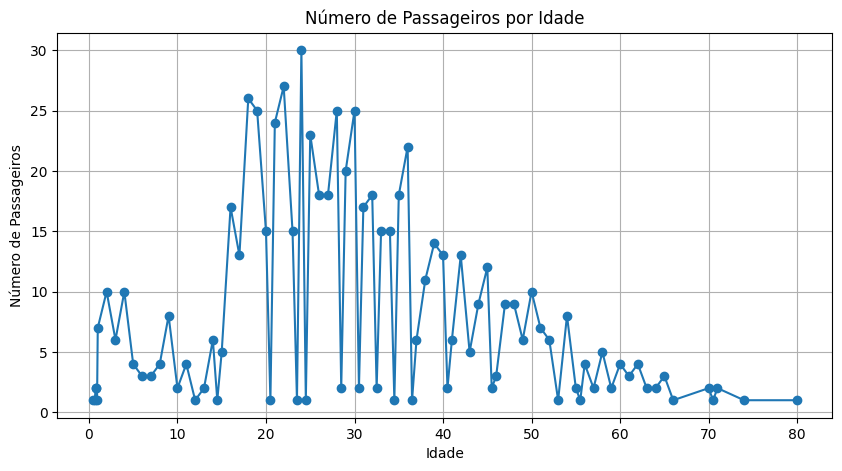

In [38]:
# passageiros por idade
idade_counts = df['Age'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.plot(idade_counts.index, idade_counts.values, marker='o')
plt.title('Número de Passageiros por Idade')
plt.xlabel('Idade')
plt.ylabel('Número de Passageiros')
plt.grid(True)
plt.show()

**De acordo com o plot acima, é possível perceber que a maior parte dos passageiros tinham entre 15 e 40 anos, com um número especialmente alto de pessoas de 25 a 30 anos. Em contrapartida, havia um número inferior de crianças e um menor ainda de idosos 60+.**

# Gráfico de barras

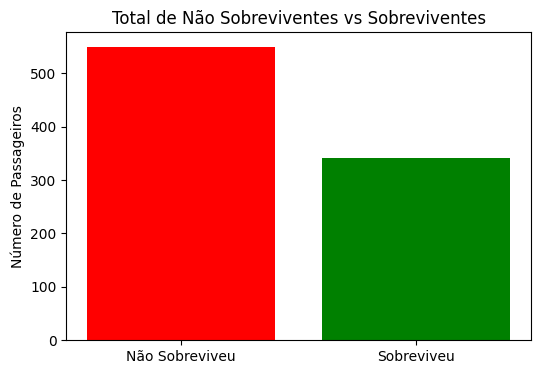

In [39]:
# contagem de sobreviventes
survived_counts = df['Survived'].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(['Não Sobreviveu', 'Sobreviveu'], survived_counts.values, color=['red', 'green'])
plt.title('Total de Não Sobreviventes vs Sobreviventes')
plt.ylabel('Número de Passageiros')
plt.show()

**De acordo com o plot acima, é possível perceber que houveram em torno de 200 vítimas fatais a mais do que vítimas não fatais.**

# Gráfico de pizza

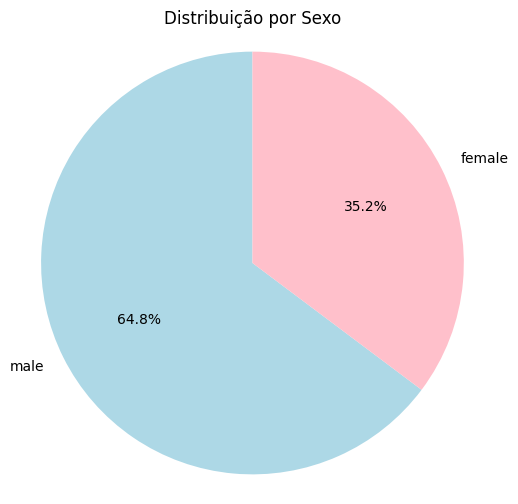

In [45]:
# contagem por sexo
sex_counts = df['Sex'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(sex_counts.values, labels=sex_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'pink'])
plt.title('Distribuição por Sexo')
plt.axis('equal')
plt.show()

**De acordo com o plot acima, é possível perceber que a grande maioria dos passageiros eram do sexo masculino (quase 65%).**

# Gráfico de dispersão

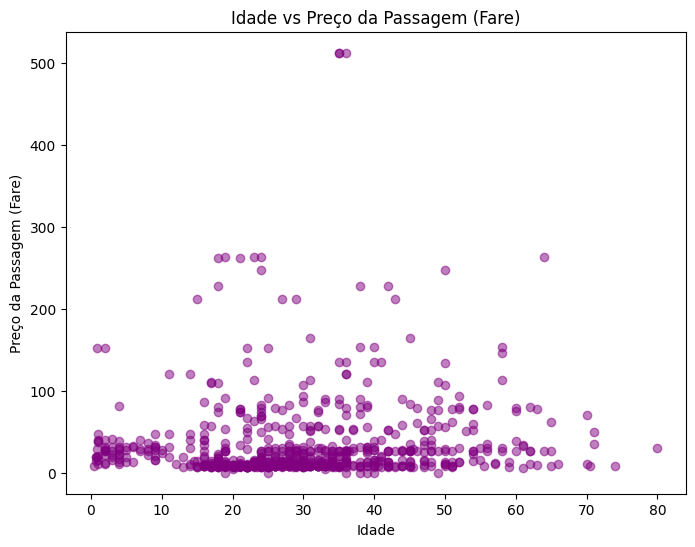

In [41]:
# idade vs preço da passagem
scatter_data = df[['Age', 'Fare']].dropna() # removendo linhas c idade ou fare nulos

plt.figure(figsize=(8, 6))
plt.scatter(scatter_data['Age'], scatter_data['Fare'], alpha=0.5, c='purple')
plt.title('Idade vs Preço da Passagem (Fare)')
plt.xlabel('Idade')
plt.ylabel('Preço da Passagem (Fare)')
plt.show()

**De acordo com o plot acima, é possível perceber que a grande maioria dos passageiros pagaram as passagens mais baratas (fare <= 100) e que, dentre os que optaram por passagens mais caras (fare >= 200), quase todos tinham entre 15-45 anos.**

# Desafio Final

Taxa de sobrevivência por classe:
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


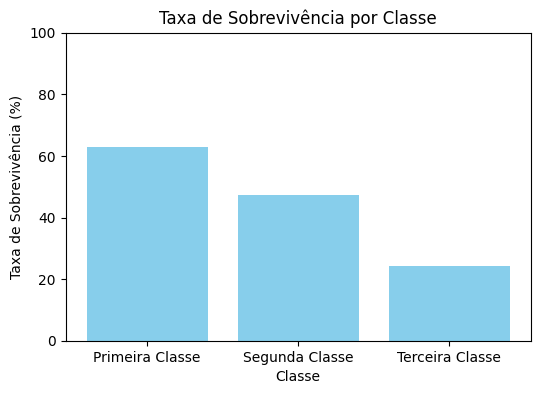

In [42]:
survival_by_class = df.groupby('Pclass')['Survived'].mean() * 100

print('Taxa de sobrevivência por classe:')
print(survival_by_class)

class_names = {1: 'Primeira Classe', 2: 'Segunda Classe', 3: 'Terceira Classe'}

# criando uma lista com os nomes
labels = [class_names[classe] for classe in survival_by_class.index]

plt.figure(figsize=(6,4))
plt.bar(labels, survival_by_class.values, color='skyblue')
plt.title('Taxa de Sobrevivência por Classe')
plt.xlabel('Classe')
plt.ylabel('Taxa de Sobrevivência (%)')
plt.ylim(0, 100)
plt.show()


**De acordo com o plot acima, é possível perceber que a taxa de sobrevivência foi maior (63%) para os passageiros que estavam viajando em classes superiores e foi menor para os que viajaram em classes inferiores (24%)**


Taxa de sobrevivência por faixa etária:
FaixaEtaria
Adulto       40.145985
Criança      58.441558
Idoso        26.923077
Jovem        36.500000
Sem Idade    29.378531
Name: Survived, dtype: float64


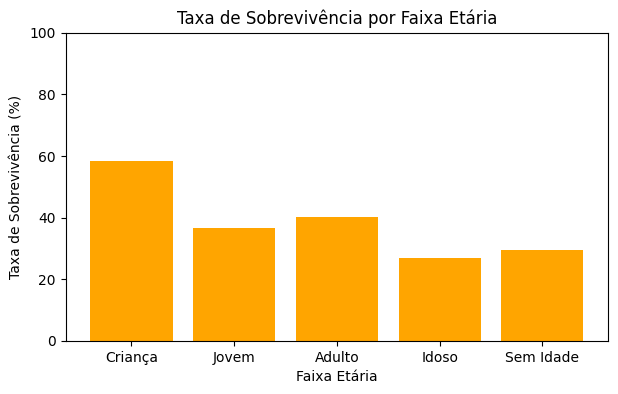

In [43]:
def faixa_etaria(idade):
    if idade <= 14:
        return 'Criança'
    elif idade <= 24:
        return 'Jovem'
    elif idade <= 59:
        return 'Adulto'
    else:
        return 'Idoso'

df['FaixaEtaria'] = df['Age'].apply(lambda x: faixa_etaria(x) if pd.notnull(x) else 'Sem Idade')

survival_by_age_group = df.groupby('FaixaEtaria')['Survived'].mean() * 100

print('\nTaxa de sobrevivência por faixa etária:')
print(survival_by_age_group)

plt.figure(figsize=(7,4))
survival_by_age_group = survival_by_age_group.reindex(['Criança', 'Jovem', 'Adulto', 'Idoso', 'Sem Idade'])
plt.bar(survival_by_age_group.index, survival_by_age_group.values, color='orange')
plt.title('Taxa de Sobrevivência por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Taxa de Sobrevivência (%)')
plt.ylim(0, 100)
plt.show()

**De acordo com o plot acima, também foi possível perceber que o grupo com o maior índice de sobrevivência foi o das crianças (58%), ao passo que o grupo com o menor foi o dos idosos (27%).**


Taxa de sobrevivência por sexo:
Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


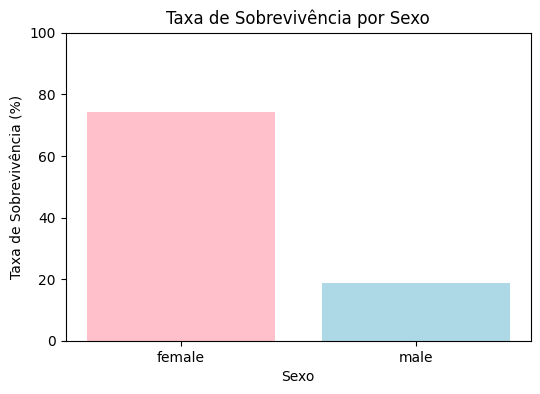

In [44]:
survival_by_sex = df.groupby('Sex')['Survived'].mean() * 100

print('\nTaxa de sobrevivência por sexo:')
print(survival_by_sex)

plt.figure(figsize=(6,4))
plt.bar(survival_by_sex.index, survival_by_sex.values, color=['pink', 'lightblue'])
plt.title('Taxa de Sobrevivência por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Taxa de Sobrevivência (%)')
plt.ylim(0, 100)
plt.show()

**De acordo com o plot acima, foi possível perceber que as mulheres tiveram um índice de sobrevivência bastante superior (74%) ao dos homens (19%)**